In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

from fits import tractor_cat

# PTF 50-200 comparisons 

In [18]:
d={}
d50= tractor_cat('../tractor_cat_ptf/25g25R/tractor-custom-150385p02200.fits')
d100= tractor_cat('../tractor_cat_ptf/50g50R/tractor-custom-150385p02200.fits')
d150= tractor_cat('../tractor_cat_ptf/75g75R/tractor-custom-150385p02200.fits')
d200= tractor_cat('../tractor_cat_ptf/100g100R/tractor-custom-150385p02200.fits')
print d50.keys()
g,r= 1,2

['bx', 'shapeexp_r_ivar', 'tycho2inblob', 'decam_psfsize', 'ebv', 'shapeexp_e1_ivar', 'decam_apflux_ivar', 'shapeexp_r', 'decam_flux_ivar', 'shapeexp_e2_ivar', 'decam_fracflux', 'bx0', 'fracdev', 'out_of_bounds', 'decam_allmask', 'brick_primary', 'decam_apflux', 'ninblob', 'shapeexp_e1', 'type', 'decam_flux', 'decam_rchi2', 'blob', 'brickname', 'decam_apflux_resid', 'shapeexp_e2', 'shapedev_e2', 'shapedev_e1', 'decam_fracin', 'ra', 'left_blob', 'decam_nobs', 'objid', 'shapedev_r_ivar', 'decam_anymask', 'by', 'brickid', 'shapedev_e1_ivar', 'shapedev_r', 'fracdev_ivar', 'ra_ivar', 'by0', 'dchisq', 'decam_mw_transmission', 'dec', 'shapedev_e2_ivar', 'decam_fracmasked', 'dec_ivar']


In [30]:
def ptf_mag(data):
    g,r= 1,2
    ind= np.all((data['decam_flux'][:,g] > 0,data['decam_flux'][:,r] > 0),axis=0)
    data['gmag']= -2.5*np.log10(data['decam_flux'][:,g][ind])
    data['rmag']= -2.5*np.log10(data['decam_flux'][:,r][ind])

In [31]:
# data['decam_flux'][0,g]
ptf_mag(d50)
ptf_mag(d100)
ptf_mag(d150)
ptf_mag(d200)

In [54]:
set(d200['type'])

{'COMP', 'DEV ', 'EXP ', 'PSF ', 'SIMP'}

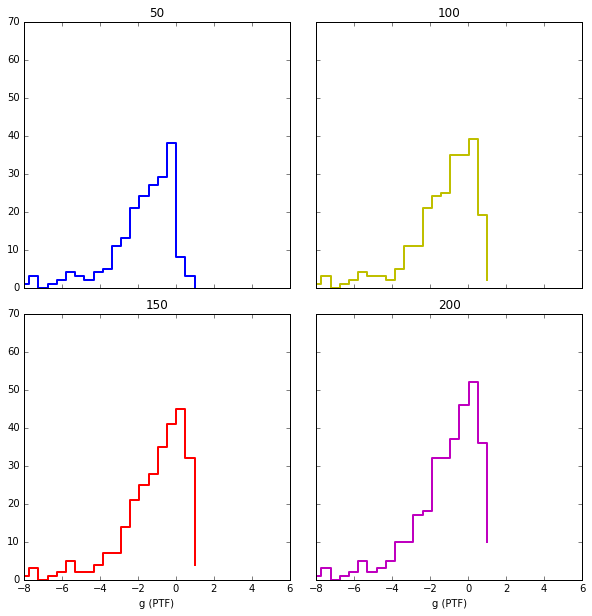

In [50]:
#N per band
for band in ['g','r']:
    h={}
    key='%smag' % band
    h['d200']= plt.hist(d200[key],bins=20,edgecolor='y',facecolor='none',lw=2)
    bins=h['d200'][1]
    h['d50']= plt.hist(d50[key],bins=bins,edgecolor='b',facecolor='none',lw=2)
    h['d100']= plt.hist(d100[key],bins=bins,edgecolor='c',facecolor='none',lw=2)
    h['d150']= plt.hist(d150[key],bins=bins,edgecolor='m',facecolor='none',lw=2)
    plt.close()
    fig,axes=plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0.1,wspace=0.1)
    for cnt,key,c in zip(range(4),['d50','d100','d150','d200'],['b','y','r','m']): 
        ax[cnt].step(h[key][1][:-1],h[key][0],where='post',lw=2,c=c)
        ax[cnt].set_title(key[1:])
        ax[cnt].set_xlim(-8,6)
        ax[cnt].set_ylim(0,70)
        if cnt >= 2: ax[cnt].set_xlabel('g (PTF)')
    plt.savefig('./n_%sband.png' % band)
    plt.close()

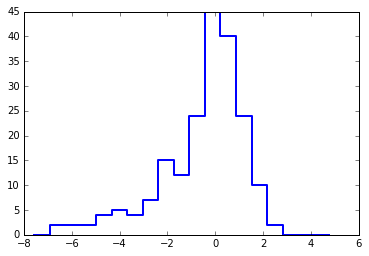

In [41]:
#N per TYPE
for typ in list(set(d50['type'])):
    h={}
    key='%smag' % typ
    h['d200']= plt.hist(d200[],bins=20,edgecolor='y',facecolor='none',lw=2)
    bins=h['d200'][1]
    h['d50']= plt.hist(d50[key],bins=bins,edgecolor='b',facecolor='none',lw=2)
    h['d100']= plt.hist(d100[key],bins=bins,edgecolor='c',facecolor='none',lw=2)
    h['d150']= plt.hist(d150[key],bins=bins,edgecolor='m',facecolor='none',lw=2)
    plt.close()
    fig,axes=plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0.1,wspace=0.1)
    for cnt,key,c in zip(range(4),['d50','d100','d150','d200'],['b','y','r','m']): 
        ax[cnt].step(h[key][1][:-1],h[key][0],where='post',lw=2,c=c)
        ax[cnt].set_title(key[1:])
        ax[cnt].set_xlim(-8,6)
        ax[cnt].set_ylim(0,70)
        if cnt >= 2: ax[cnt].set_xlabel('g (PTF)')
    plt.savefig('./n_%sband.png' % band)
    plt.close()

In [65]:
d200['type']

array(['PSF ', 'EXP ', 'PSF ', 'PSF ', 'PSF ', 'PSF ', 'PSF ', 'PSF ',
       'PSF ', 'PSF ', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'SIMP',
       'EXP ', 'SIMP', 'PSF ', 'DEV ', 'PSF ', 'PSF ', 'PSF ', 'SIMP',
       'DEV ', 'PSF ', 'DEV ', 'DEV ', 'SIMP', 'SIMP', 'SIMP', 'SIMP',
       'SIMP', 'COMP', 'PSF ', 'SIMP', 'PSF ', 'EXP ', 'PSF ', 'SIMP',
       'PSF ', 'PSF ', 'PSF ', 'PSF ', 'EXP ', 'EXP ', 'EXP ', 'PSF ',
       'SIMP', 'EXP ', 'PSF ', 'SIMP', 'SIMP', 'DEV ', 'SIMP', 'EXP ',
       'SIMP', 'SIMP', 'PSF ', 'PSF ', 'PSF ', 'SIMP', 'PSF ', 'PSF ',
       'SIMP', 'SIMP', 'SIMP', 'PSF ', 'PSF ', 'PSF ', 'SIMP', 'PSF ',
       'SIMP', 'SIMP', 'SIMP', 'SIMP', 'PSF ', 'SIMP', 'SIMP', 'SIMP',
       'SIMP', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'SIMP', 'SIMP', 'PSF ',
       'SIMP', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'PSF ', 'PSF ',
       'PSF ', 'SIMP', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'SIMP',
       'SIMP', 'PSF ', 'SIMP', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP',
      

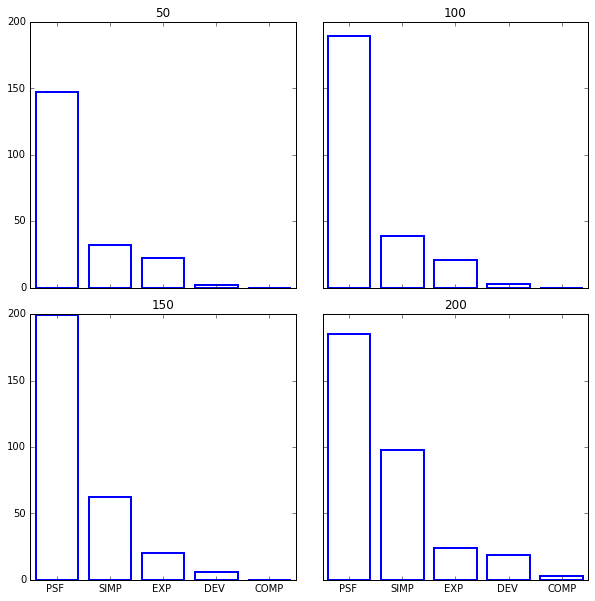

In [77]:
testNames= ['PSF ','SIMP','EXP ','DEV ','COMP'] #list(set(d200['type']))
pos = np.arange(len(testNames)) + 0.5
fig,axes=plt.subplots(2,2,figsize=(10,10)) #,sharex=True,sharey=True)
ax=axes.flatten()
plt.subplots_adjust(hspace=0.1,wspace=0.1)
ax[0].bar(pos, [(d50['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=[""]*5,lw=2,\
                        edgecolor='b',facecolor='none')
ax[1].bar(pos, [(d100['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=[""]*5,lw=2,\
                        edgecolor='b',facecolor='none')
ax[2].bar(pos, [(d150['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=testNames,lw=2,\
                        edgecolor='b',facecolor='none')
ax[3].bar(pos, [(d200['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=testNames,lw=2,\
                        edgecolor='b',facecolor='none')
for i in [1,3]: ax[i].yaxis.set_major_formatter(plt.NullFormatter())
for i in range(4): ax[i].set_ylim(0,200)
for cnt,title in enumerate(['50','100','150','200']): ax[cnt].set_title(title)
plt.savefig('./n_type.png')
# plt.close()


In [61]:
(d50['type'] == 'PSF ').sum()

(203,)

In [4]:
a=fits.open("../ptf_test/tractor-custom-150385p02200.fits")

In [9]:
a[1].data

FITS_rec([ (-1, 'custom-150385p02200', 0, True, 0, 2, False, 'PSF', 150.42635821352121, 5.2504871e+10, 2.1302973385463391, 4.8712163e+10, 102.18633, 1.0567238, 104.0, 1.0, False, False, array([ 8232.30664062,  8163.39648438,  8230.39550781,  8230.38378906,
           0.        ], dtype=float32), 0.017356807, array([  0.        ,   7.47725439,  15.95682716,   0.        ,
         0.        ,   0.        ], dtype=float32), array([  0.        ,  55.29242706,  20.19062424,   0.        ,
         0.        ,   0.        ], dtype=float32), array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.72893155,   1.46605825,   2.29628515,   4.33576059,
          5.71594334,   7.02689552,   7.09407187,   6.99522686],
       [  1.39439499,   2.83541203,   4.43656683,   8.37290287,
         11.19778919,  14.41354656,  15.03293228,  14.81234646],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         

In [6]:
hd,data=tractor_cat('../ptf_test/tractor-custom-150385p02200.fits')

NameError: global name 'tbdata' is not defined

/Users/kburleigh/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide
/Users/kburleigh/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide


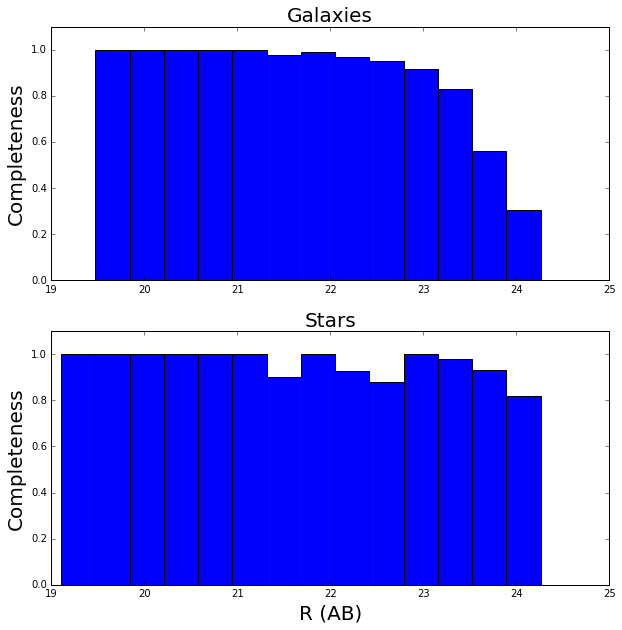

In [12]:
#same magnitude bins for detections
lo=int(min(m_gal['bestr'].min(),un_gal['bestr'].min(),m_star['bestr'].min(),un_star['bestr'].min()))-1
hi=int(max(m_gal['bestr'].max(),un_gal['bestr'].max(),m_star['bestr'].max(),un_star['bestr'].max()))+1
bins=np.linspace(lo,hi,20)
h={}
h['m_gal']= plt.hist(m_gal['bestr'],bins=bins)
h['un_gal']= plt.hist(un_gal['bestr'],bins=bins)
h['m_star']= plt.hist(m_star['bestr'],bins=bins)
h['un_star']= plt.hist(un_star['bestr'],bins=bins)
plt.close()
#plot normalizing by total counts
fig,ax=plt.subplots(2,1,figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.2)
kwargs=dict(bar=dict(color='b'), text=dict(fontsize=20)) #,edgecolor='b',linewidth=2.,fill=False)
mpl.rcParams['xtick.labelsize'] = kwargs['text']['fontsize']-10
mpl.rcParams['ytick.labelsize'] = kwargs['text']['fontsize']-10
#panel 1
width= h['m_gal'][1][1:]-h['m_gal'][1][:-1]
ax[0].bar(h['m_gal'][1][:-1],h['m_gal'][0]/(h['m_gal'][0]+h['un_gal'][0]),width=width,**kwargs['bar'])
ax[0].set_ylabel("Completeness",**kwargs['text'])
ax[0].set_title("Galaxies",**kwargs['text'])
#panel 2
ax[1].bar(h['m_star'][1][:-1],h['m_star'][0]/(h['m_star'][0]+h['un_star'][0]),width=width,**kwargs['bar'])
ax[1].set_ylabel("Completeness",**kwargs['text'])
ax[1].set_title("Stars",**kwargs['text'])
ax[1].set_xlabel("R (AB)",**kwargs['text'])
for i in range(2):
    ax[i].set_ylim(0,1.1)
plt.savefig("completeness.png")

In [59]:
def row_col_plot(nrow,ncol,x,y,scatter=False,indices=None,fname='test.png',titles=None,xlim=False,ylim=False,logx=False,logy=False):
    '''x,y have shape (nrow*ncol,values,extra_axis)
    extra_axis is not necessary if plotting single line per plot otherwise extra axis 
    contains those lines'''
    assert(nrow == 1 or ncol == 1)
    assert(x.shape[0] == nrow*ncol)
    w,h=20,10
    fig,axes=plt.subplots(nrow,ncol,figsize=(w,h))
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0,wspace=0)
    cnt=0
    for i in range(len(ax)):
        if len(x.shape) == 3: #exta_axis, multiple lines per plot
            for extra in range(x.shape[2]):
                #some values may be nan or inf if some lines longer than others
                iuse= np.isfinite(x[cnt,:,extra])
                if scatter: ax[i].scatter(x[cnt,iuse,extra],y[cnt,iuse,extra])
                else: ax[i].plot(x[cnt,iuse,extra],y[cnt,iuse,extra])
        else: 
            if scatter: ax[i].scatter(x[cnt,:],y[cnt,:])
            else: ax[i].plot(x[cnt,:],y[cnt,:])
        if titles is not None: ax[i].set_title('%s' % titles[cnt])
        cnt+=1
    for i in range(len(ax)):
        if xlim: ax[i].set_xlim(xlim[0],xlim[1])
        if ylim: ax[i].set_ylim(ylim[0],ylim[1])
        if logx: ax[i].set_xscale('log')
        if logy: ax[i].set_yscale('log')
#     for i in range(len(ax)):
#         if r != range(nrow)[-1]: ax[i].xaxis.set_major_formatter(plt.NullFormatter())
#         if c != 0: ax[i].yaxis.set_major_formatter(plt.NullFormatter())
#     plt.savefig(fname)
#     plt.close()

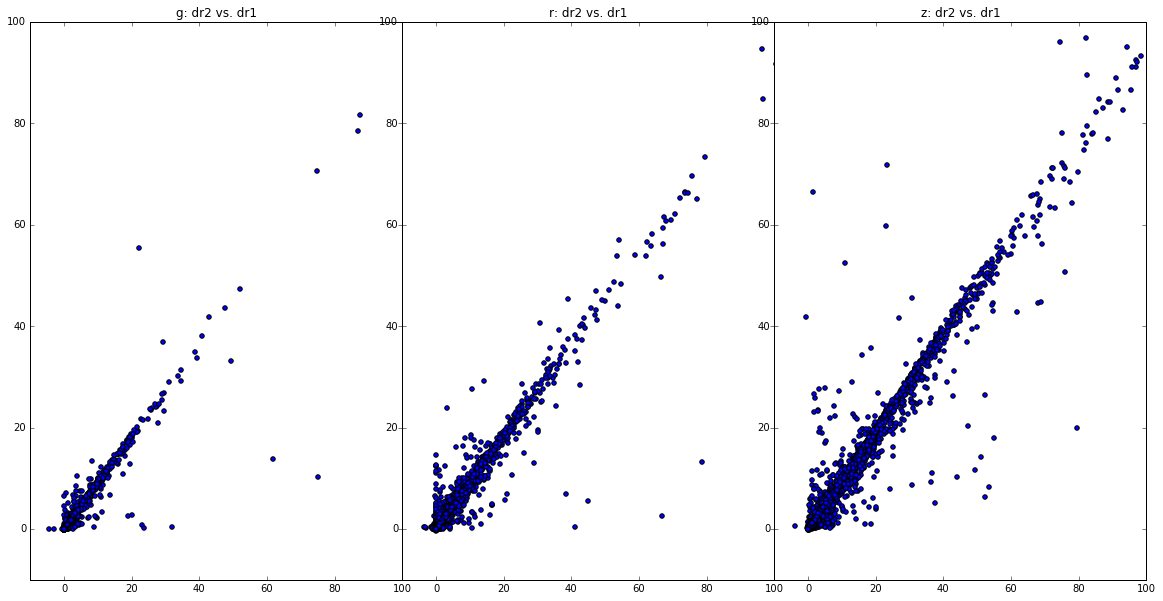

In [62]:
x=np.zeros( (3,len(data['dr1_gflux']),2) )
y=x.copy()
for i,dr1,dr2 in zip(range(3),
                     ['dr1_gflux', 'dr1_rflux', 'dr1_zflux'],
                    ['dr2_gflux', 'dr2_rflux', 'dr2_zflux']):
    x[i,:,0]= data[dr1]
#     x[i,:,1]= data[dr1] #drawing straight line
    y[i,:,0]= data[dr2]
#     y[i,:,1]= x[i,:,1]
titles=['%s: dr2 vs. dr1' % b for b in ['g','r','z']]
row_col_plot(1,3,x,y,titles=titles,scatter=True,ylim=[-10,100],xlim=[-10,100])

In [86]:
bashCommand = "date"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output = process.communicate()[0]
output

'Wed Feb 17 15:42:33 PST 2016\n'